In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from Functions.databuilder import dataBuilder

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)


import warnings
warnings.filterwarnings('ignore')
sns.set(rc = {'figure.figsize':(15, 5)})


In [2]:
data1 = dataBuilder(293528)
# data2 = dataBuilder(298595)
# data3 = dataBuilder(306325)

In [3]:
#EDA
import os
path = './Plots/02Clustering'
os.makedirs(path,exist_ok=True)

In [4]:
data_for_scaling = data1[['RunNumber','PedestalValue']]
data_for_scaling = data_for_scaling.fillna(0)

scaled_=scaler.fit_transform(data_for_scaling)
scaled_=pd.DataFrame(scaled_,columns=data_for_scaling.columns)


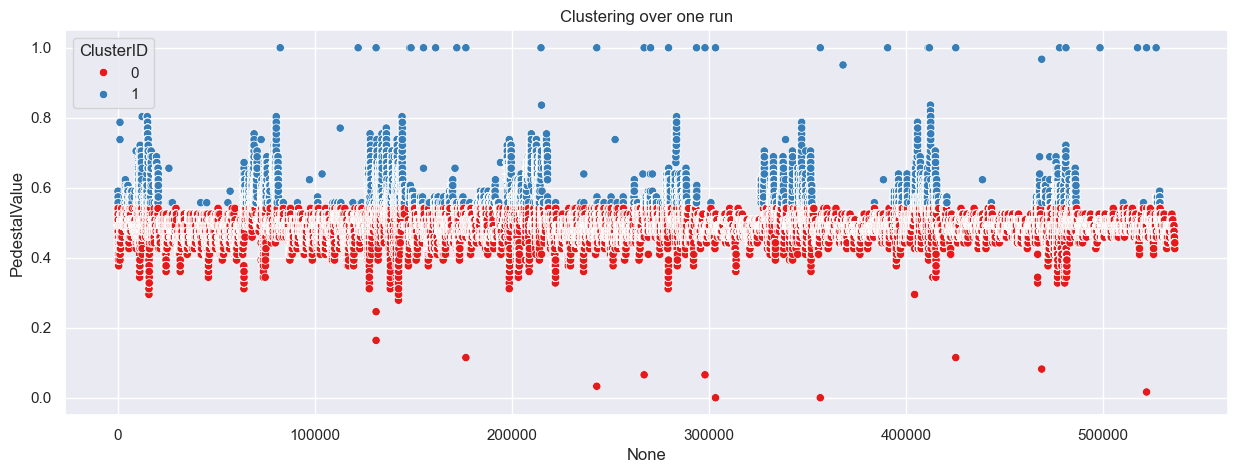

In [5]:
kmeans.fit(scaled_)
label=kmeans.labels_
scaled_['Cluster'] = label
sns.scatterplot(x=scaled_.index, y=scaled_['PedestalValue'], hue=scaled_['Cluster'], palette='Set1')

plt.legend(title="ClusterID")
plt.title('Clustering over one run')
plt.savefig(f'{path}/Clustering.png')
plt.show()
